In [1]:
# Import data from JSON file

import json
import pandas as pd

data = []
with open('pressure.json') as f:
  data = json.load(f)

# Turn list into dataframe
df = pd.DataFrame(data)

# Print the first few rows of the dataframe
print(df.head())


      pressure  _creationTime                          deviceId
0  1012.469727  1716380669818  j571a1ejhbg100tj6v229rz95s6qyzj3
1  1012.477539  1716380670843  j571a1ejhbg100tj6v229rz95s6qyzj3
2  1012.470215  1716380671854  j571a1ejhbg100tj6v229rz95s6qyzj3
3  1012.474609  1716380672868  j571a1ejhbg100tj6v229rz95s6qyzj3
4  1012.492920  1716380673896  j571a1ejhbg100tj6v229rz95s6qyzj3


In [2]:
# Plot the data
data_1s = df['pressure'][:240]

# If data would be collected every 5 seconds
data_5s = data_1s[::5]

# If data would be collected every 10 seconds
data_10s = data_1s[::10]

# If data would be collected every 20 seconds
data_20s = data_1s[::20]

In [3]:
mean_1s = data_1s.mean()
mean_5s = data_5s.mean()
mean_10s = data_10s.mean()
mean_20s = data_20s.mean()

print('Mean temperature for 1s data: ', mean_1s)
print('Mean temperature for 5s data: ', mean_5s)
print('Mean temperature for 10s data: ', mean_10s)
print('Mean temperature for 20s data: ', mean_20s)

Mean temperature for 1s data:  1012.5425059000651
Mean temperature for 5s data:  1012.5434773763021
Mean temperature for 10s data:  1012.5405069986979
Mean temperature for 20s data:  1012.5487263997396


In [4]:
std_1s = data_1s.std()
std_5s = data_5s.std()
std_10s = data_10s.std()
std_20s = data_20s.std()

print('Standard deviation for 1s data: ', std_1s)
print('Standard deviation for 5s data: ', std_5s)
print('Standard deviation for 10s data: ', std_10s)
print('Standard deviation for 20s data: ', std_20s)

Standard deviation for 1s data:  0.04020600025829474
Standard deviation for 5s data:  0.037571804255083295
Standard deviation for 10s data:  0.03638218297691928
Standard deviation for 20s data:  0.03833501975743848


In [5]:
max_1s = data_1s.max()
max_5s = data_5s.max()
max_10s = data_10s.max()
max_20s = data_20s.max()

min_1s = data_1s.min()
min_5s = data_5s.min()
min_10s = data_10s.min()
min_20s = data_20s.min()

print('Max temperature for 1s data: ', max_1s)
print('Max temperature for 5s data: ', max_5s)
print('Max temperature for 10s data: ', max_10s)
print('Max temperature for 20s data: ', max_20s)
print('\n')
print('Min temperature for 1s data: ', min_1s)
print('Min temperature for 5s data: ', min_5s)
print('Min temperature for 10s data: ', min_10s)
print('Min temperature for 20s data: ', min_20s)

Max temperature for 1s data:  1012.636962890625
Max temperature for 5s data:  1012.614013671875
Max temperature for 10s data:  1012.6103515625
Max temperature for 20s data:  1012.594970703125


Min temperature for 1s data:  1012.44677734375
Min temperature for 5s data:  1012.46875
Min temperature for 10s data:  1012.4697265625
Min temperature for 20s data:  1012.4697265625


In [6]:
skewness_1s = data_1s.skew()
skewness_5s = data_5s.skew()
skewness_10s = data_10s.skew()
skewness_20s = data_20s.skew()

print('Skewness for 1s data: ', skewness_1s)
print('Skewness for 5s data: ', skewness_5s)
print('Skewness for 10s data: ', skewness_10s)
print('Skewness for 20s data: ', skewness_20s)

Skewness for 1s data:  -0.09000633089455581
Skewness for 5s data:  0.05760493835918559
Skewness for 10s data:  0.13202742094566966
Skewness for 20s data:  -0.6537457218662078


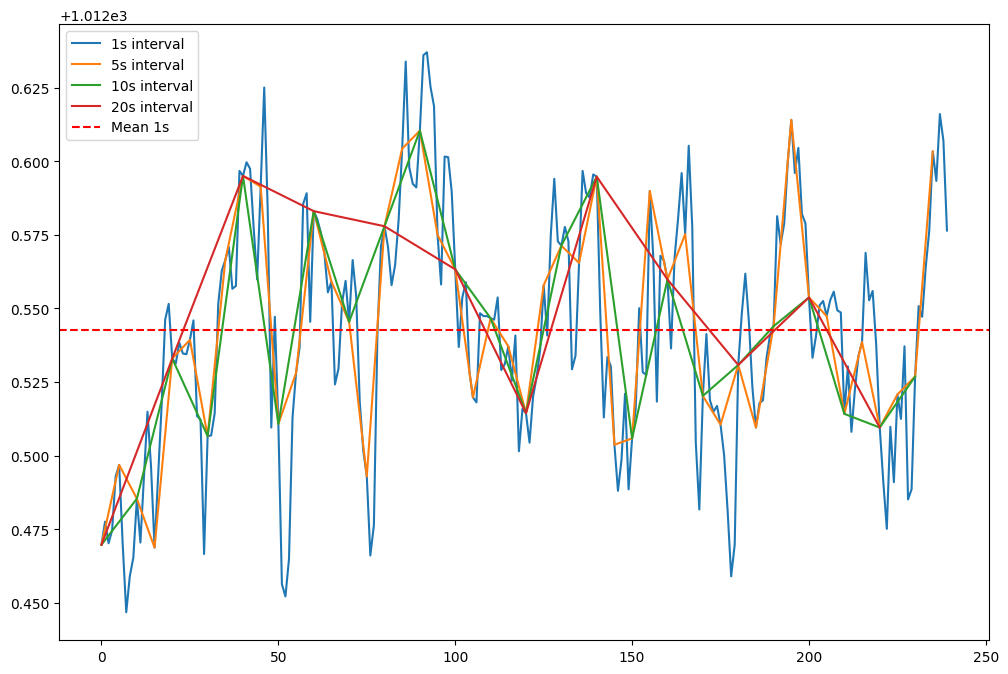

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(data_1s, label='1s interval')
plt.plot(data_5s, label='5s interval')
plt.plot(data_10s, label='10s interval')
plt.plot(data_20s, label='20s interval')
plt.axhline(mean_1s, color='r', linestyle='--', label='Mean 1s')
plt.legend()
plt.show()

In [8]:
# Perform t-test on data_1s and data_10s
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(data_1s, data_5s)
print('T-statistic: ', t_stat)
print('P-value: ', p_value)

t_stat, p_value = ttest_ind(data_1s, data_10s)
print('T-statistic: ', t_stat)
print('P-value: ', p_value)

t_stat, p_value = ttest_ind(data_1s, data_20s)
print('T-statistic: ', t_stat)
print('P-value: ', p_value)


T-statistic:  -0.15443363017210454
P-value:  0.8773767616200858
T-statistic:  0.23409439608851781
P-value:  0.8150945162939836
T-statistic:  -0.524083706799867
P-value:  0.600684641238626
